1. Kernel Density Estimate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import scipy as sc

In [3]:
N = 1000
mu = 10
sigma = 50
x = np.random.normal(mu, sigma, N)

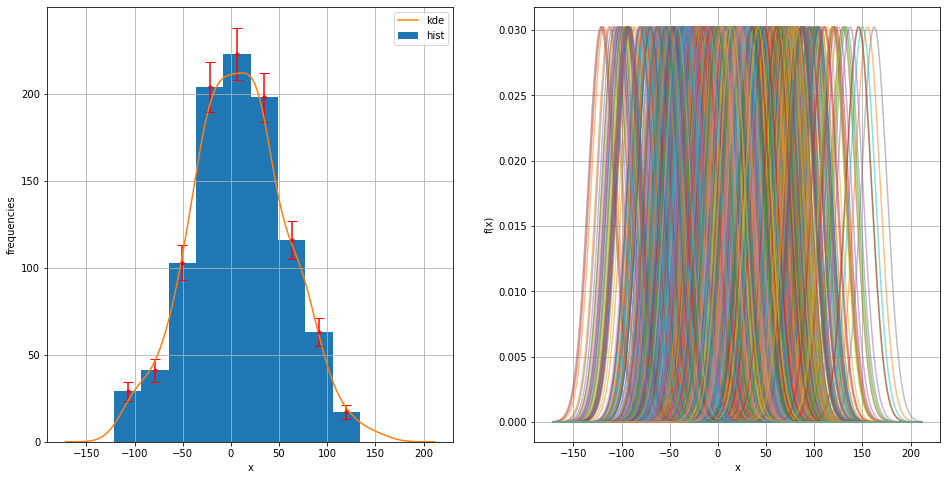

In [5]:
# Create histogram
Nbins = 10

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

freq, bins, patches  = ax1.hist(x, bins=np.arange(x.min(), x.max(), (x.max()-x.min())/Nbins),label='hist',)
bincenters = (bins[1:] + bins[:-1])/2
ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq), fmt='o', c='r', marker='*', markersize=4, capsize=5)

ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('frequencies')

# Create Gaussians
std_default = 1.06 * x.std() * (x.size ** -0.2)

xrange = np.arange(x.min()-sigma, x.max()+sigma)
gaussians = []
for i, dat in enumerate(x):
    gaussians.append( norm(loc=dat, scale=std_default).pdf(xrange) )
    ax2.plot(xrange, gaussians[i], alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid()

# Create KDE
area = integrate.trapz(freq, dx=bins[1]-bins[0])
kde = np.array(gaussians).sum(axis=0)
ax1.plot(xrange, kde/sum(kde)*area, label='kde')
ax1.legend()

plt.show()

2. Color-coded scatter plot

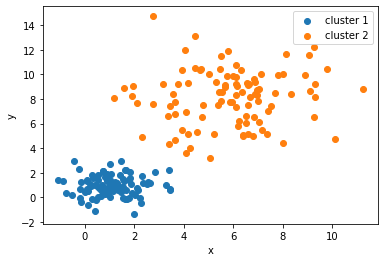

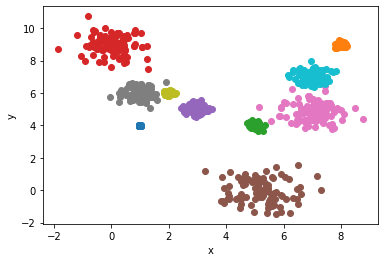

In [6]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

sigma1, sigma2 = 1,2
center1 = (1,1)                                                                                    
center2 = (3,4) 
points = np.random.normal(size=(100,4))
points[:,0] += center1[0]
points[:,1] += center1[1]
points[:,2] += center2[0]
points[:,3] += center2[1]
points[:,:2] *= sigma1
points[:,2:] *= sigma2

plt.scatter(points[:,0], points[:,1], label='cluster 1')
plt.scatter(points[:,2], points[:,3], label='cluster 2')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

n = 10
sigmas = np.random.rand(n)    
centers = np.random.randint(0,10,size=(n, 2))
points = np.random.normal(size=(100, 2*n))
points[:,::2] *= sigmas
points[:,1::2] *= sigmas
points[:,0::2] += centers[:,0]
points[:,1::2] += centers[:,1]
for i in range(n):
    plt.scatter(points[:,i*2],points[:,i*2+1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

3. Profile plot

In [ ]:
data = np.load("residuals_261.npy", allow_pickle=True)
df = np.array([data[np.newaxis][0]["residuals"],data[np.newaxis][0]["distances"]]).T
df = pd.DataFrame(df)
df.columns = ["residuals","distances"]
# Clean the samples
df = df[abs(df["residuals"])<2]
df.describe()

In [ ]:
reg = sc.stats.linregress(df["distances"], df["residuals"])

In [ ]:
# Plot x, y, res
x = np.linspace(0,21,8)
binned = []
k = 0 
for j in x[1:]: 
    binned.append(df.query("distances<{} & distances>={}".format(j,k))["residuals"].values) 
    k = j 
      
y = list(map(lambda p: p.mean(),binned))
yerr = list(map(lambda p: p.std(),binned))

joint = sns.jointplot("distances", "residuals", data=df, kind="reg")
joint.ax_joint.errorbar((x[:-1]+x[1:])/2, y, yerr=yerr, fmt='o', c='r')

plt.show()